In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *
import warnings

# excel表中存在一些格式无法读取，抑制警告输出
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

LetsPlot.setup_html(no_js=True)

plt.style.use(
    "./data/plot_style.txt"
)

# Part 2.1 Collecting data by playing a public goods game
## Python Walkthrough 2.1
Plotting a line chart with multiple variables

In [2]:
# 保留1位小数
pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_excel(
    "./data/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
).iloc[:10, 1:4]

df.head()

,Copenhagen,Dnipropetrovs’k,Minsk
0,14.1,11.0,12.8
1,14.1,12.6,12.3
2,13.7,12.1,12.6
3,12.9,11.2,12.3
4,12.3,11.3,11.8


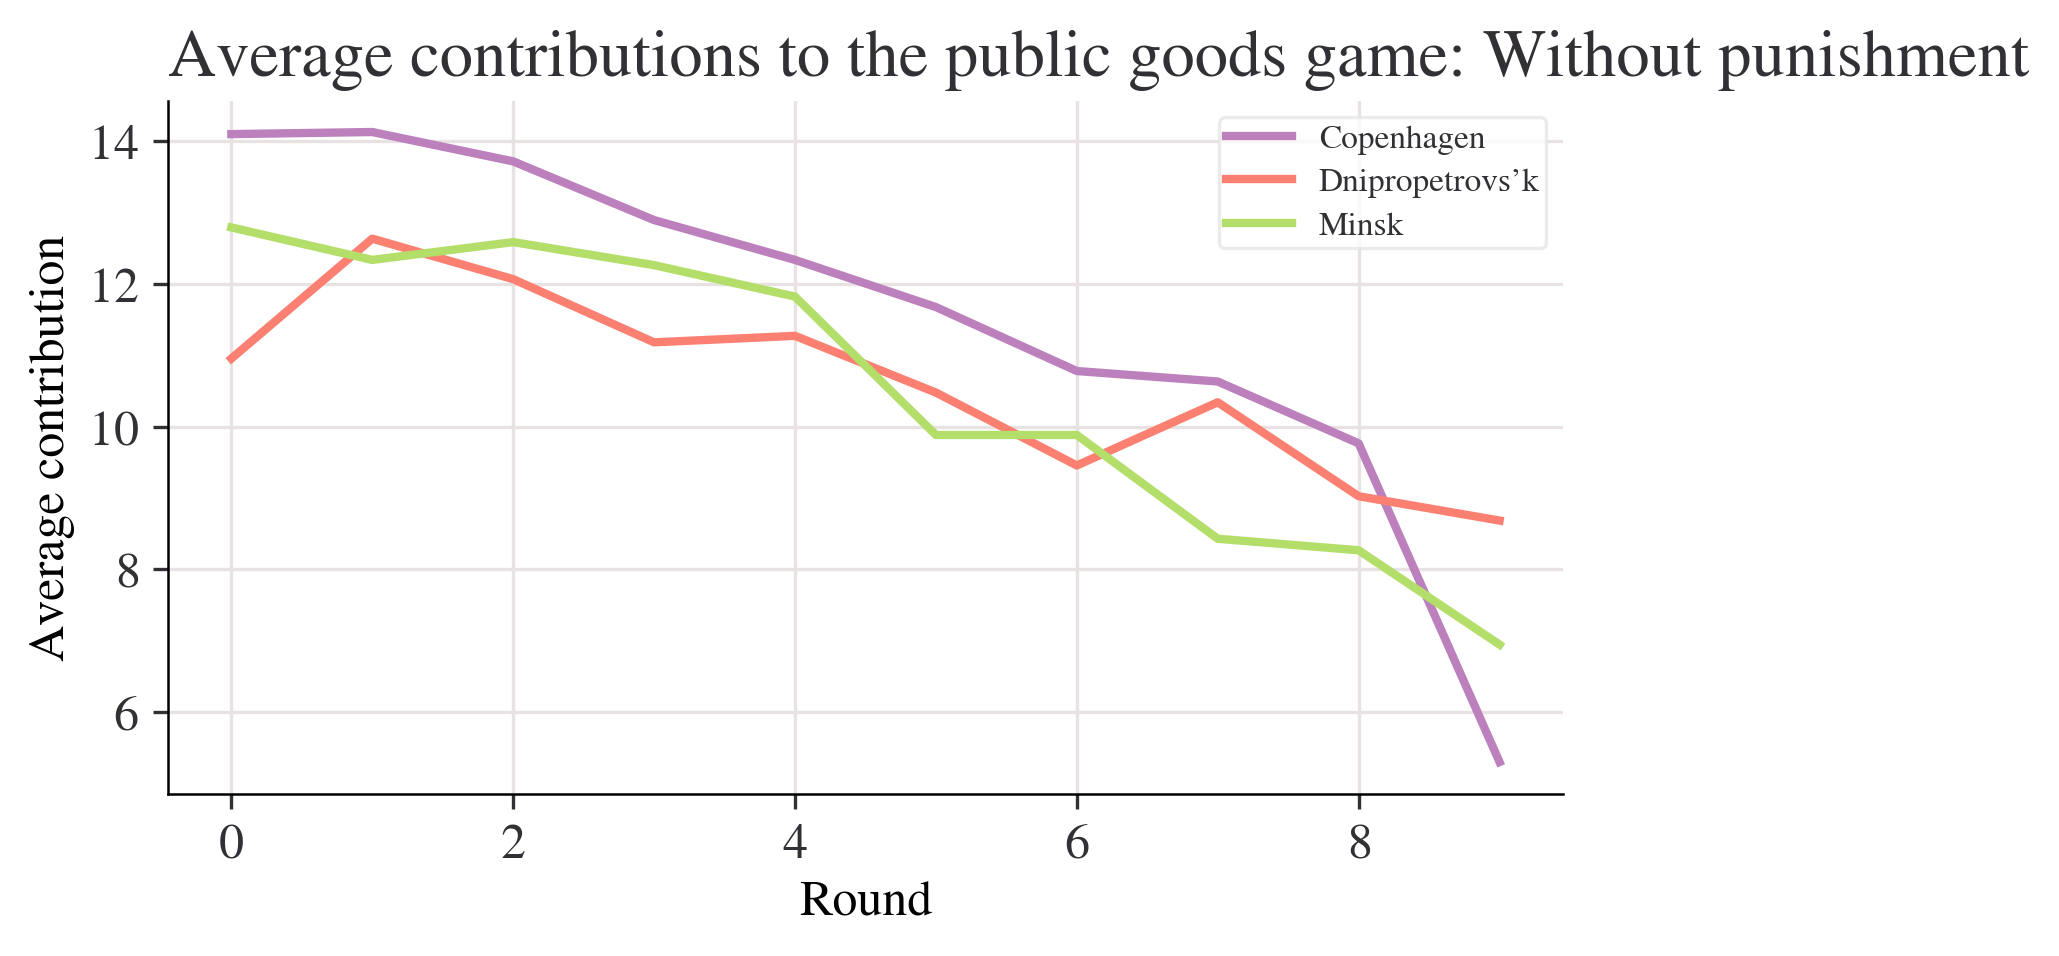

In [3]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

### Q2
Compare your line chart with Figure 3 of Herrmann et al. (2008).1 Comment on any similarities or differences between the results (for example, the amount contributed at the start and end, or the change in average contributions over the course of the game).

From the graph, we can observe the following points:
Initial Contributions:
    Copenhagen (purple line) starts with the highest initial contribution, around 14 units.
    Dnipro (orange line) has a slightly lower initial contribution, around 12.5 units.
    Minsk (green line) has the lowest initial contribution, around 12 units.

Contribution Trends:
    All three locations show a decline in average contributions over the 9 rounds of the game.
    Copenhagen's contributions decrease most significantly, dropping to about 3 units by the ninth round.
    Dnipro's contributions also decline but at a more gradual pace, ending at approximately 9 units by the ninth round.
    Minsk's contributions show a similar downward trend but stabilize after the sixth round, ending at about 7 units by the ninth round.

Volatility:
    Copenhagen's contribution curve is relatively smooth, showing a consistent and significant decline.
    Dnipro's contribution curve exhibits some volatility, particularly between the fifth and seventh rounds, where there is a slight rebound.
    Minsk's contribution curve decreases sharply in the early rounds and then levels off.


### Q3
Can you think of any reasons why your results are similar to (or different from) those in Figure 3? You may find it helpful to read the ‘Experiments’ section of the Herrmann et al. (2008) study for a more detailed description of how the experiments were conducted.

The three locations exhibit different patterns of contribution in the public goods game without punishment. Copenhagen begins with the highest initial contribution but sees a rapid decline over time. Dnipro and Minsk start with slightly lower contributions and experience a slower decline, with their contributions stabilizing in later rounds. These differences may be attributed to participants' strategic choices, social norms, or other unmeasured factors.

## Python walk-through 2.2
Importing the datafile into Python

In [4]:
data_np = pd.read_excel(
    "./data/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

In [5]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


In [6]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


In [7]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [8]:
data_n

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,14.1,11.0,12.8,13.7,9.5,10.8,11.1,13.0,10.8,10.0,8.2,8.0,10.9,8.1,8.9,8.2
2,14.1,12.6,12.3,12.8,11.0,11.5,12.2,12.7,10.8,10.0,9.1,7.7,10.5,6.3,9.0,7.3
3,13.7,12.1,12.6,12.4,11.5,11.7,10.8,12.7,11.5,10.2,9.9,7.2,9.1,6.4,8.4,6.2
4,12.9,11.2,12.3,10.6,10.3,11.3,10.6,11.4,10.7,10.0,9.7,7.9,9.0,6.3,6.9,6.0
5,12.3,11.3,11.8,11.0,9.8,10.3,8.5,11.0,10.7,9.1,9.0,7.9,8.1,6.7,5.8,5.4
6,11.7,10.5,9.9,10.7,10.3,10.2,7.1,10.1,9.4,7.7,8.6,7.8,5.4,6.3,4.5,5.0
7,10.8,9.5,9.9,10.1,10.2,8.7,7.4,9.1,7.7,6.6,7.9,8.1,5.3,5.9,3.9,4.3
8,10.6,10.3,8.4,9.5,10.1,8.2,7.3,6.2,8.6,6.0,7.1,8.3,4.7,6.3,3.2,3.2
9,9.8,9.0,8.3,7.4,9.6,8.2,6.2,4.2,7.4,4.5,5.9,7.5,4.1,5.9,2.2,2.3


In [9]:
data_p

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,15.4,9.5,11.8,15.0,9.2,10.8,13.2,16.0,12.1,9.9,9.7,6.1,11.3,5.8,6.5,7.8
2,17.0,9.9,13.2,16.7,10.3,11.3,15.0,17.8,13.5,11.1,12.1,6.8,13.9,5.6,6.6,10.5
3,17.7,11.8,12.9,17.6,10.1,11.7,15.8,18.6,14.1,12.3,13.3,6.7,14.7,5.9,6.7,12.8
4,18.2,11.5,13.4,17.4,10.0,11.8,16.3,18.9,14.0,13.4,14.1,7.9,14.4,6.2,6.5,13.6
5,18.4,12.7,14.0,17.6,9.6,11.2,16.4,18.2,15.4,14.4,14.4,7.6,15.3,6.2,7.0,15.1
6,18.7,11.8,13.0,17.3,9.9,12.2,16.6,18.6,14.4,15.4,15.3,7.6,16.4,5.9,7.2,15.8
7,18.7,11.2,13.2,16.8,10.3,12.2,17.2,18.7,15.2,15.7,16.0,6.2,16.4,5.6,7.5,16.2
8,18.3,10.7,13.7,16.8,10.8,12.2,17.0,18.1,15.5,16.0,16.8,6.4,16.7,4.8,7.8,16.5
9,18.1,9.7,12.4,16.9,9.7,12.4,17.6,18.2,16.0,15.9,17.3,7.1,16.3,4.7,7.8,17.1


## Python Walkthrough 2.3
Calculating the mean using different methods

In [10]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

/tmp/ipykernel_5234/3801786469.py:2: FutureWarning: The provided callable <function mean at 0x7fbe10f46e80> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)


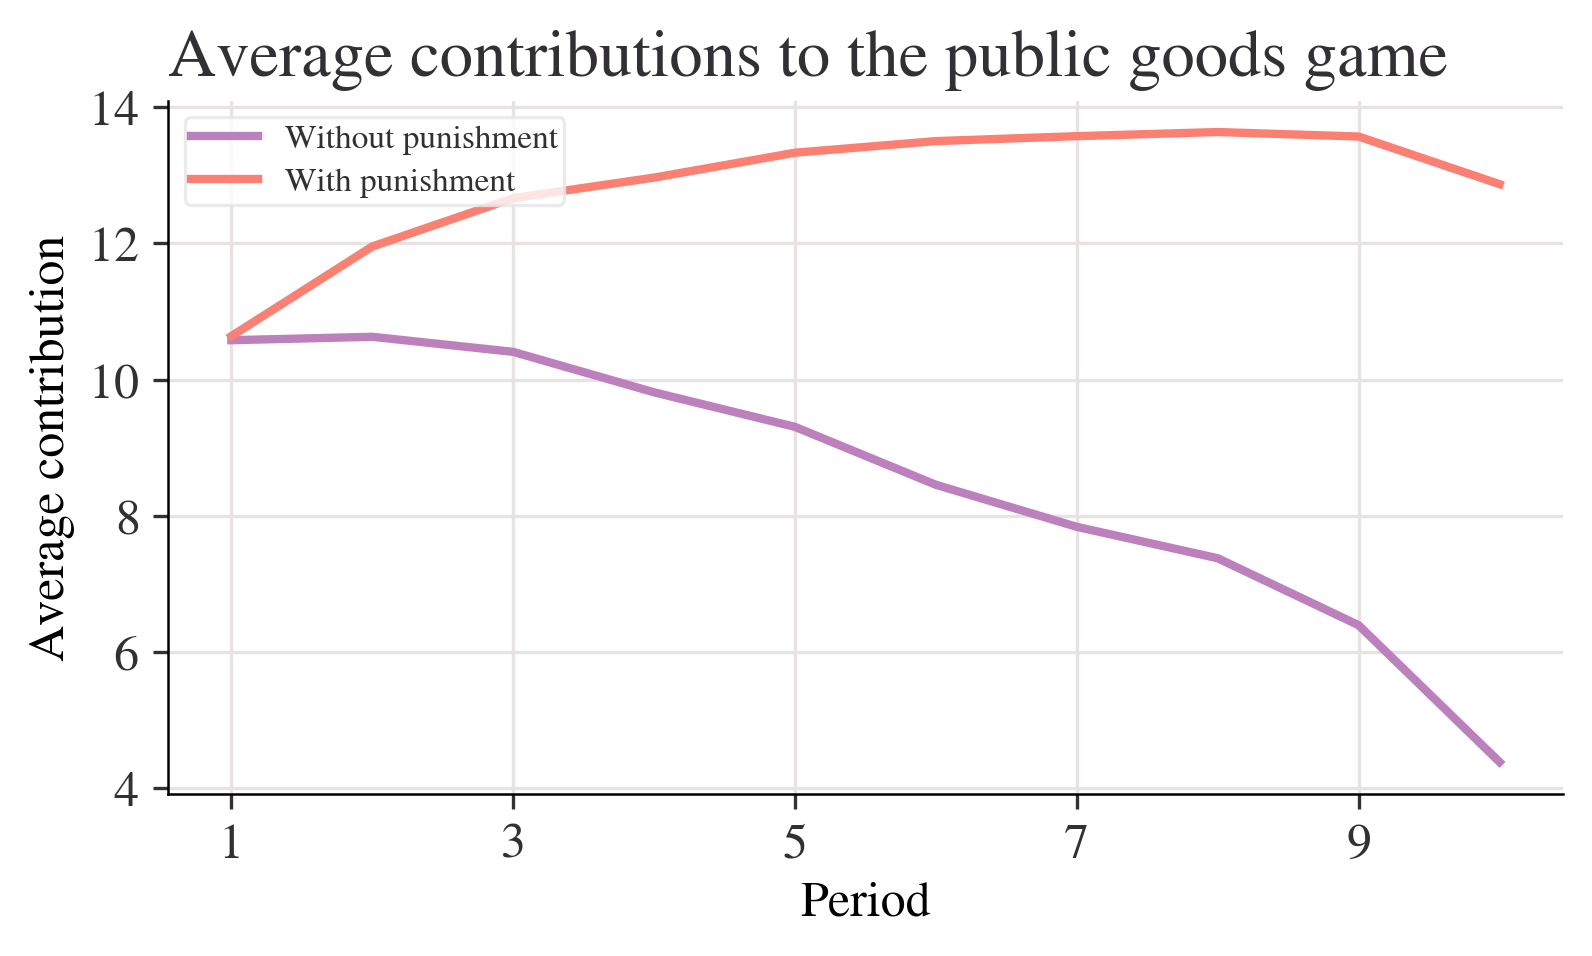

In [11]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

## Python walk-through 2.4
Drawing a column chart to compare two groups

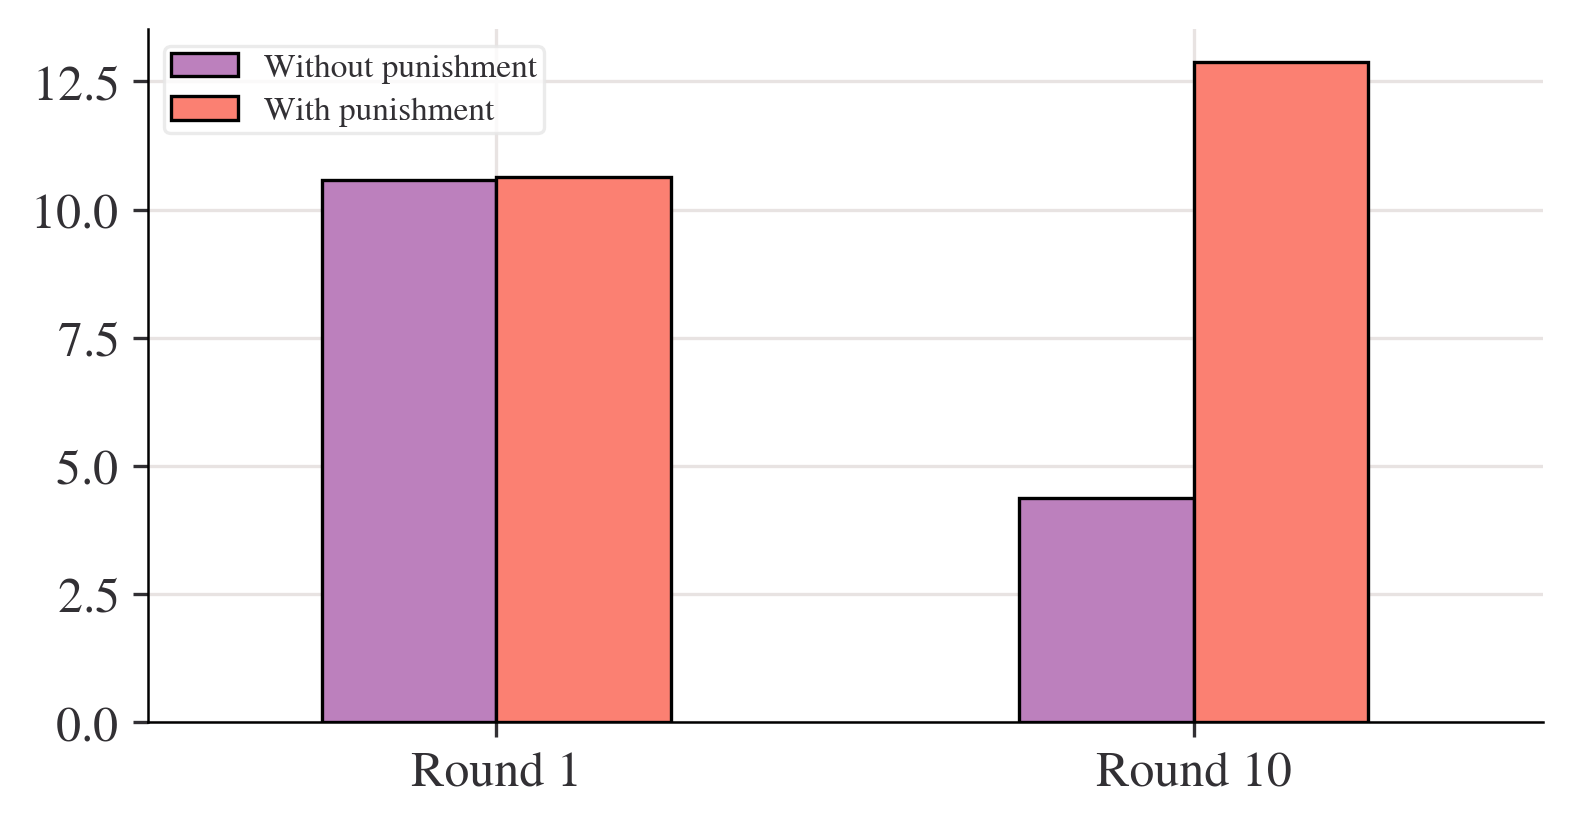

In [12]:
# Q3 (a)
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

## Python walk-through 2.5
Calculating and understanding standard deviation

In [13]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

,std,var,mean
Period,,,
1,2.0,4.1,10.6
2,2.2,5.0,10.6
3,2.3,5.4,10.4
4,2.1,4.3,9.8
5,2.1,4.4,9.3
6,2.2,5.0,8.5
7,2.1,4.6,7.8
8,2.3,5.5,7.4
9,2.4,5.8,6.4


In [14]:
p_c = data_p.agg(["std", "var", "mean"], 1)
p_c

,std,var,mean
Period,,,
1,3.2,10.3,10.6
2,3.7,13.7,12.0
3,3.9,15.1,12.7
4,3.9,14.9,13.0
5,3.9,15.6,13.3
6,4.1,16.7,13.5
7,4.3,18.4,13.6
8,4.3,18.8,13.6
9,4.5,19.9,13.6


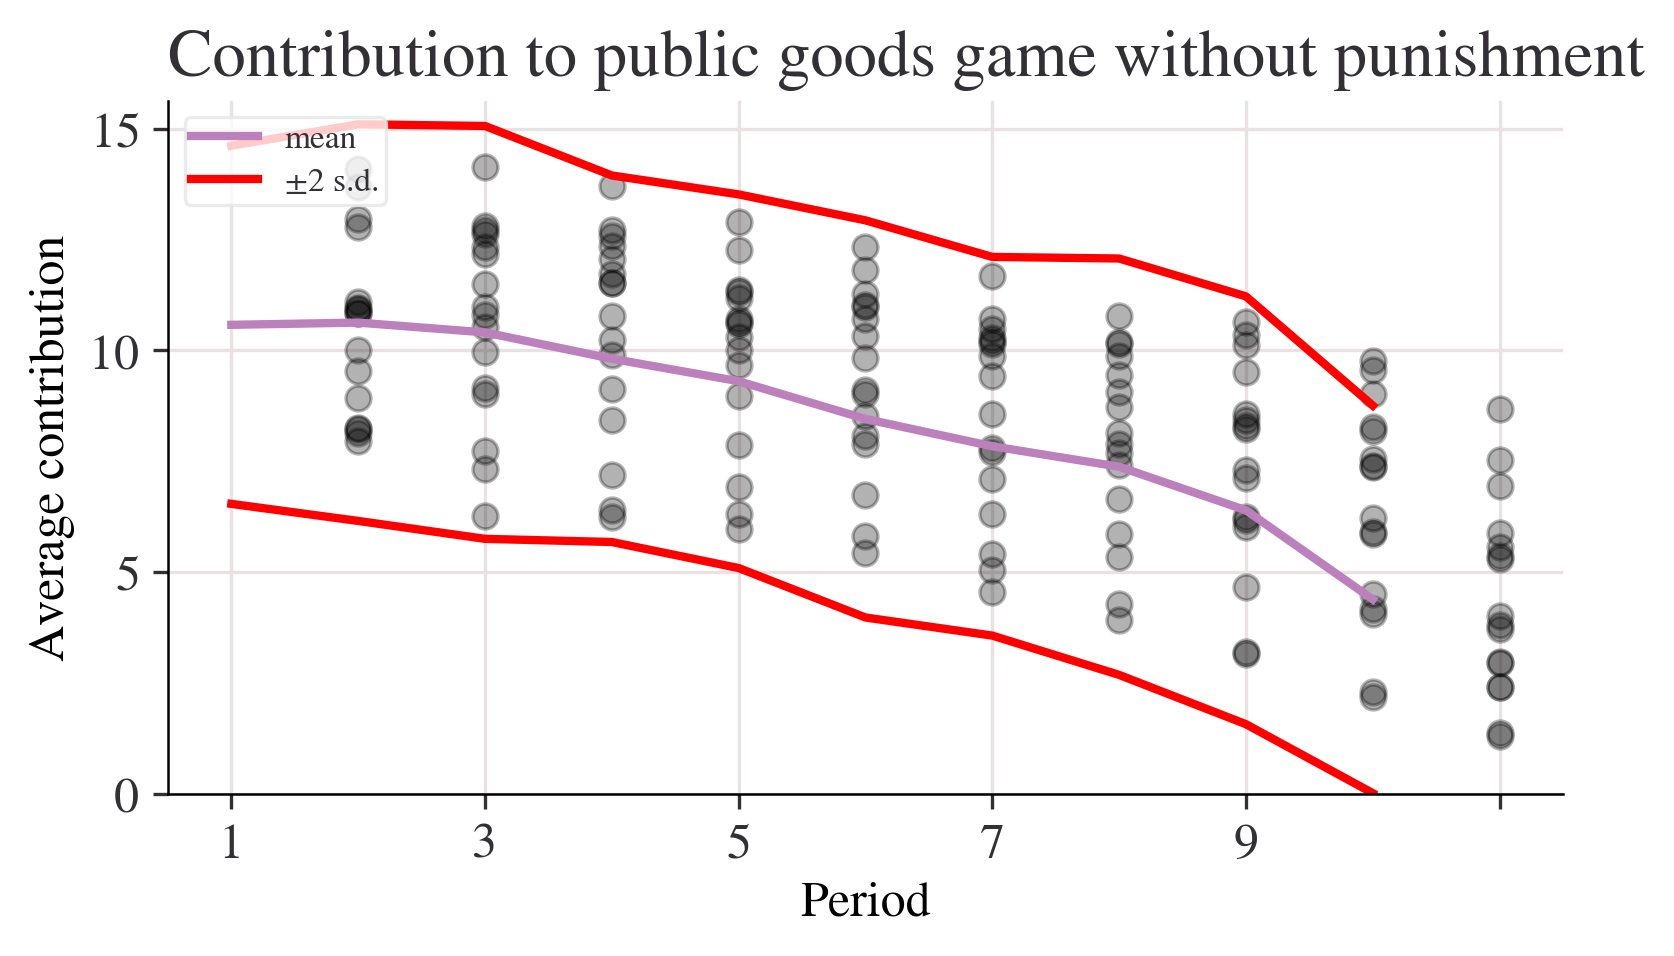

In [15]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

## Python walk-through 2.6
Finding the minimum, maximum, and range of a variable

In [16]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1    10.2
2    12.2
3    12.7
4    12.6
5    12.1
6    12.8
7    13.1
8    13.5
9    13.5
10   11.3
dtype: float64

In [17]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)

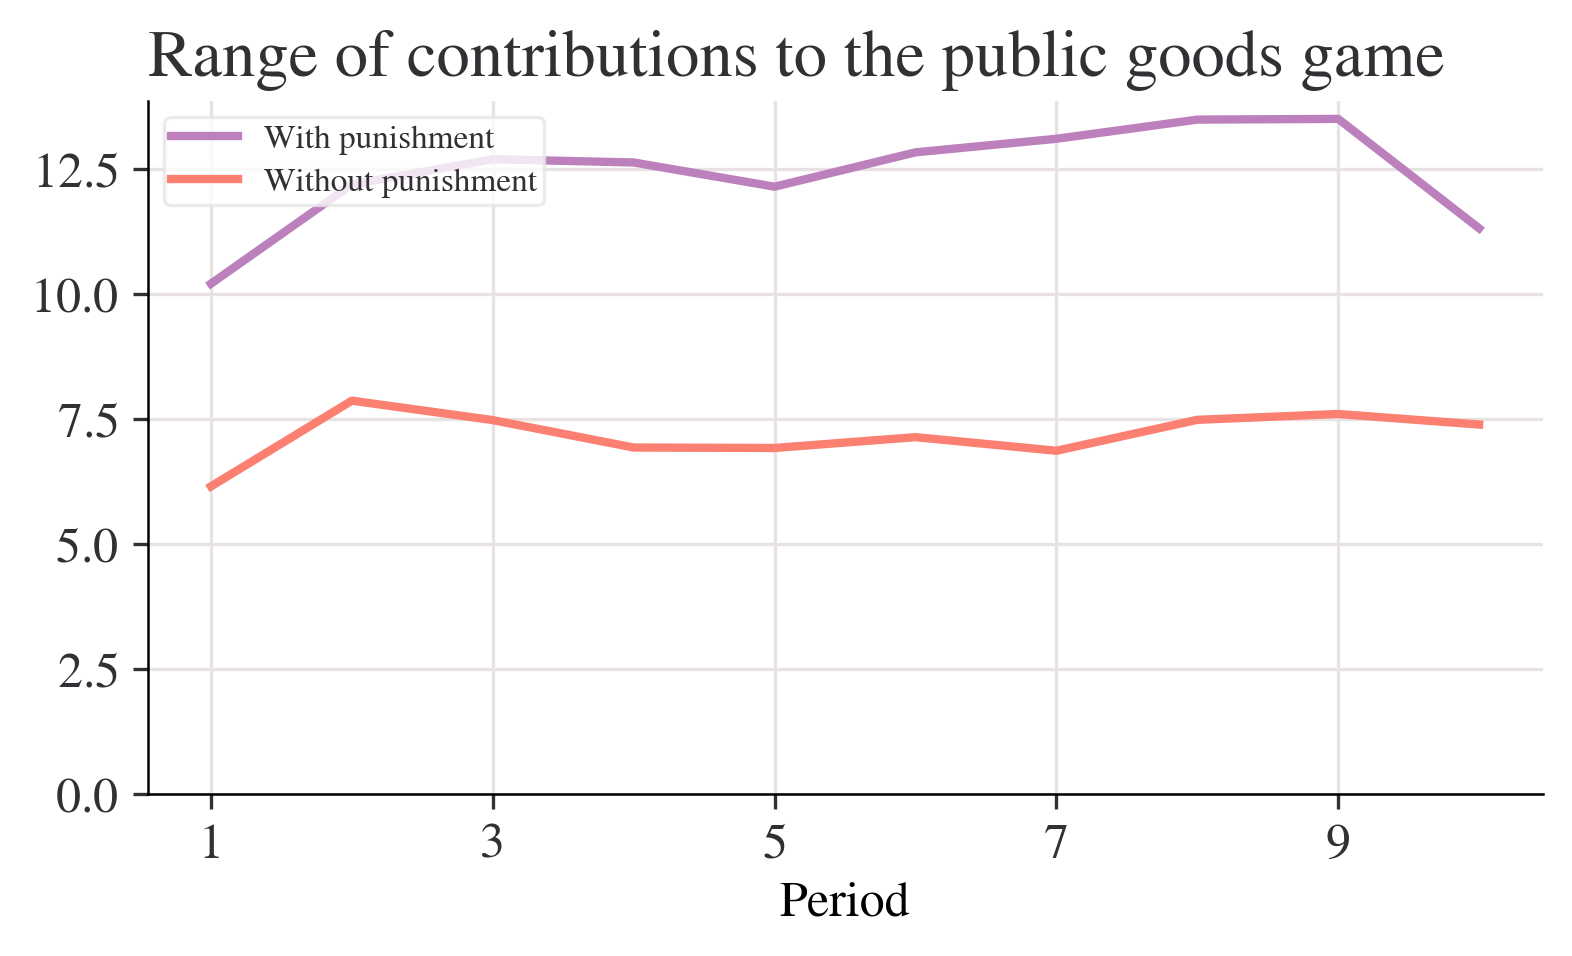

In [18]:
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show();

In [19]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [20]:
summ_n.loc[[1, 10], :].round(2)

,range,max,min,std,mean
Period,,,,,
1,6.1,14.1,8.0,2.0,10.6
10,7.4,8.7,1.3,2.2,4.4


In [21]:
summ_p.loc[[1, 10], :].round(2)

,range,max,min,std,mean
Period,,,,,
1,10.2,16.0,5.8,3.2,10.6
10,11.3,17.5,6.2,3.9,12.9


# Part 2.3 How did changing the rules of the game affect behaviours

In [33]:
# 2 (a)
# Use the ttest function to calculate the p-value for the difference in means in Period 1 (with and without punishment).

from scipy.stats import ttest_ind

# 提取第1期无惩罚和有惩罚的数据
no_punishment_period_1 = data_np.iloc[0, :].astype(float)
punishment_period_1 = data_np.iloc[14, :].astype(float)

# 计算第1期的平均贡献
no_punishment_avg_period_1 = no_punishment_period_1.mean()
punishment_avg_period_1 = punishment_period_1.mean()

In [34]:
# 打印第1期的平均贡献
print(f"Contributions without punishment: {no_punishment_avg_period_1}")
print(f"Contributions with punishment: {punishment_avg_period_1}")

Contributions without punishment: 10.57831343858623
Contributions with punishment: 10.638759195804596


In [36]:
# 使用t检验计算p值
t_stat, p_value = ttest_ind(no_punishment_period_1, punishment_period_1)

# 打印p值
print(f"The p-value of the mean difference in the first period: {p_value}")

The p-value of the mean difference in the first period: 0.9495666970741692


Q2 (b)

A p-value of 0.9496 indicates that there is no significant difference in the average contribution of the first period between no punishment and punishment conditions. The impact of punishment mechanism on contribution level is not significant in the first period.

## Python walk-through 2.8
Calculating the p-value for the difference in means

In [42]:
# Q3 (a)
# Use the ttest function to calculate the p-value for the difference in means in Period 10 (with and without punishment).
# 提取第10期无惩罚和有惩罚的数据
no_punishment_period_10 = data_np.iloc[9, :].astype(float)
punishment_period_10 = data_np.iloc[23, :].astype(float)

# 计算第10期的平均贡献
no_punishment_avg_period_10 = no_punishment_period_10.mean()
punishment_avg_period_10 = punishment_period_10.mean()

# 使用t检验计算p值
t_stat_10, p_value_10 = ttest_ind(no_punishment_period_10, punishment_period_10)
# 打印p值
print(f"The p-value of the mean difference in the first period: {p_value_10}")

The p-value of the mean difference in the first period: 1.809742363676441e-08


Q3 (b)

There is a significant difference in the average contribution of the 10th period between the conditions of no punishment and punishment.

Small sample size: If the sample size is small within each time period, even if significant differences are observed, it may only be due to sampling errors. A larger sample size can provide higher statistical power, helping us to more accurately determine whether differences have statistical significance.

High variability: Even if there is a significant difference in the average contribution between punished and unpunished conditions within a certain period of time, if the variability between individuals is high, this difference may not be stable. High variability means that data points are scattered, and it is difficult to draw reliable conclusions based solely on differences in mean values.

Lack of statistical testing: It is not possible to determine whether the observed differences are statistically significant based solely on their size. Appropriate statistical tests (such as t-tests, ANOVA, etc.) are needed to calculate p-values in order to evaluate whether differences may be caused by random factors.

Potential confounding variables: In addition to punishment mechanisms, there are many other factors that may affect participants' contribution behavior, such as cultural background, economic status, personal motivation, etc. It is not rigorous enough to draw conclusions based solely on differences in punishment mechanisms without controlling for these confounding variables.

Q4 (a)
Refer to the results from the public goods games.


The reason why punishment options can change participants' contribution behavior is mainly due to the following characteristics in the experimental environment:

Clear punishment rules

Fair punishment execution

Social norms and group pressure

Information Transparency

Long term perspective

Cost benefit analysis

Participants' cognition and motivation

Q4 (b)
Using Figure 2.6, explain why we need to compare the two groups in Period 1 in order to conclude that there is a causal link between the with punishment option and behaviour in the game.

By comparing the two sets of data in the first stage, we can exclude the influence of other potential factors, establish a control basis, and conclude that there is a causal relationship between punishment options and behavior in the game.

Q5
Discuss some limitations of experiments, and suggest some ways to address (or partially address) them. (You may find pages 158–171 of the paper ‘What do laboratory experiments measuring social preferences reveal about the real world?’ helpful, as well as the discussion on free riding and altruism in Section 2.6 of Economy, Society, and Public Policy.)

Although the public goods game experiment has achieved significant results in studying the impact of punishment mechanisms on behavior, there are still some limitations. By expanding the sample size, conducting on-site experiments, designing long-term follow-up studies, diversifying punishment mechanisms, investigating participants' behavioral motivations, and introducing more complex experimental designs, these limitations can be partially addressed, thereby improving the external validity and interpretability of experimental results.